# Sales Analysis
Examples from fast.ai: 
* https://github.com/fastai/fastai/blob/master/courses/dl1/lesson3-rossman.ipynb
* https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson6-rossmann.ipynb
* https://www.fast.ai/2017/11/13/validation-sets/
* https://github.com/fastai/fastai/blob/master/courses/ml1/lesson2-rf_interpretation.ipynb

## Look at the data

In [28]:
import pandas as pd
df = pd.read_csv("sales_train.csv")
df['Index'] = range(1, len(df) + 1)
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Date,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10
Year,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
Month,1,1,1,1,1,1,1,1,1,1
Week,1,1,1,1,1,1,2,2,2,2
Day,1,2,3,4,5,6,7,8,9,10
DayOfWeek,2,3,4,5,6,7,1,2,3,4
DayOfYear,0,1,2,3,4,5,6,7,8,9
StateHoliday,1,1,1,1,1,1,1,1,0,0
StateWeekend,0,0,0,0,0,0,0,0,0,0
Weekend,0,0,0,1,1,1,0,0,0,0


In [29]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,906,906,2019-03-20,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,906,NaN,NaN,NaN,2017.79,0.744462,2017,2017,2018,2018,2019
Month,906,NaN,NaN,NaN,5.92605,3.41075,1,3,5.5,9,12
Week,906,NaN,NaN,NaN,23.9095,14.8021,1,11,22,36,52
Day,906,NaN,NaN,NaN,15.6291,8.76491,1,8,16,23,31
DayOfWeek,906,NaN,NaN,NaN,4,1.99945,1,2,4,6,7
DayOfYear,906,NaN,NaN,NaN,163.642,104.195,0,75,150.5,251,364
StateHoliday,906,NaN,NaN,NaN,0.0452539,0.207975,0,0,0,0,1
StateWeekend,906,NaN,NaN,NaN,0.0441501,0.205542,0,0,0,0,1
Weekend,906,NaN,NaN,NaN,0.42936,0.495258,0,0,0,1,1


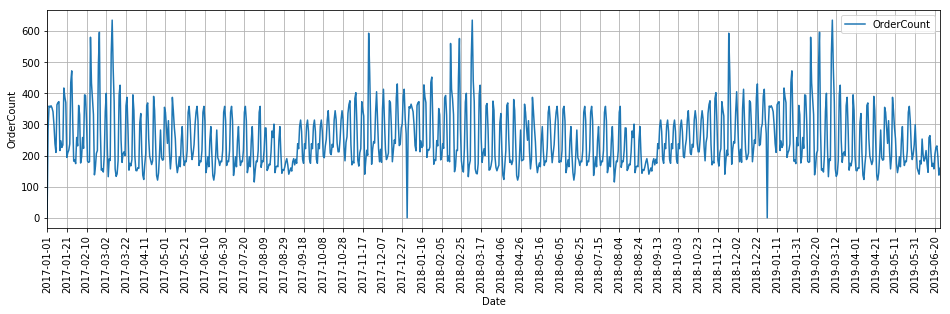

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 4]
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('OrderCount')
tickNumber = len(df.index) / 10
plt.locator_params(axis='x', nbins=tickNumber)
plt.locator_params(axis='y', nbins=10)
df.plot(grid=True, kind='line', x='Date', y='OrderCount', ax=ax)
plt.xticks(rotation=90)
plt.show()

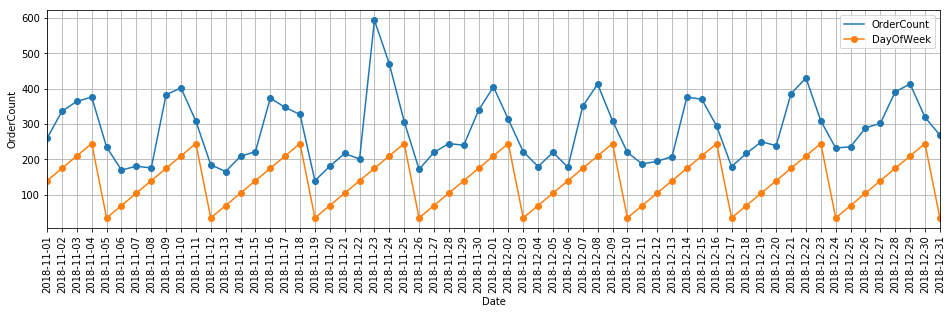

In [31]:
# Nov & Dec 2018. Show correlation between OrderCount and DayOfWeek
plt.rcParams['figure.figsize'] = [16, 4]
selection = df.loc[(df['Date'] >= '2018-11-01') & (df['Date'] < '2019-01-01')]
normalized_selection = pd.DataFrame()
normalized_selection['Date'] = selection['Date']
normalized_selection['OrderCount'] = selection['OrderCount']
normalized_selection['DayOfWeek'] = 35*selection['DayOfWeek']
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('OrderCount')
plt.locator_params(axis='x', nbins=len(normalized_selection.index))
plt.locator_params(axis='y', nbins=10)
normalized_selection.plot(grid=True, kind='line', x='Date', y='OrderCount', marker='o', ax=ax)
normalized_selection.plot(grid=True, kind='line', x='Date', y='DayOfWeek', marker='o', ax=ax)
plt.xticks(rotation=90)
plt.show()

## Feature Engineering

In [32]:
# To Do:
# - Add Durations (https://github.com/fastai/fastai/blob/master/courses/dl1/lesson3-rossman.ipynb)
# - Year => categorical!!!

# After corr analysis
# toDrop = ['Year', 'OrderSum', 'Week', 'Month', 'Weekend']
toDrop = ['Year', 'OrderSum']
df = df.drop(toDrop, axis=1)
df.head()

,Date,Month,Week,Day,DayOfWeek,DayOfYear,StateHoliday,StateWeekend,Weekend,PromoYandex,PromoClub,OrderCount,Index
0,2017-01-01,1,1,1,2,0,1,0,0,0,0,0,1
1,2017-01-02,1,1,2,3,1,1,0,0,0,0,283,2
2,2017-01-03,1,1,3,4,2,1,0,0,0,0,359,3
3,2017-01-04,1,1,4,5,3,1,0,1,0,0,355,4
4,2017-01-05,1,1,5,6,4,1,0,1,0,0,360,5


## Split data into train and test

In time series data, cross-validation is not random. Instead, our holdout data is generally the most recent data, as it would be in real application. This issue is discussed in detail here: https://www.fast.ai/2017/11/13/validation-sets/

In [33]:
y = df['OrderCount']
X = df.copy()
X.head()

,Date,Month,Week,Day,DayOfWeek,DayOfYear,StateHoliday,StateWeekend,Weekend,PromoYandex,PromoClub,OrderCount,Index
0,2017-01-01,1,1,1,2,0,1,0,0,0,0,0,1
1,2017-01-02,1,1,2,3,1,1,0,0,0,0,283,2
2,2017-01-03,1,1,3,4,2,1,0,0,0,0,359,3
3,2017-01-04,1,1,4,5,3,1,0,1,0,0,355,4
4,2017-01-05,1,1,5,6,4,1,0,1,0,0,360,5


In [34]:
import sklearn
print(sklearn.__version__)
# 0.18 - no shuffle option in train_test_split
# conda install scikit-learn
# 0.18 => 0.20.3

0.20.3


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

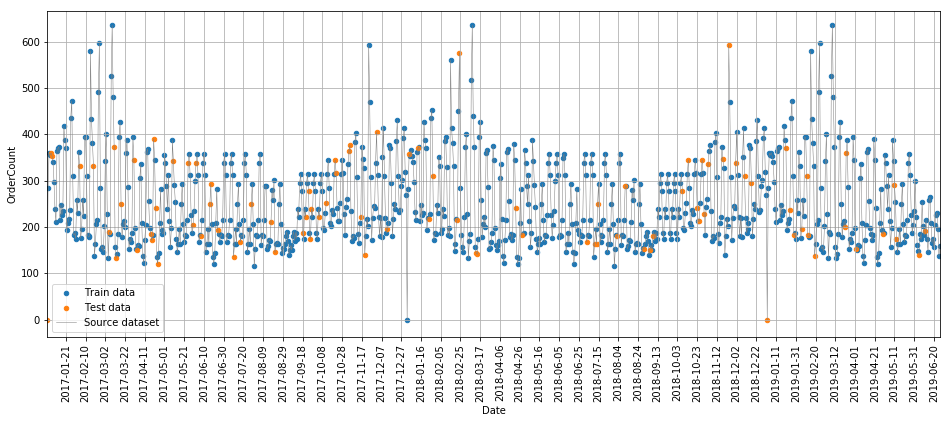

In [36]:
# Merge columns and show train and test data
plt.rcParams['figure.figsize'] = [16, 6]
fig, ax = plt.subplots()

tickNumber = len(X.index) / 10
plt.locator_params(axis='x', nbins=tickNumber)
plt.locator_params(axis='y', nbins=10)

X_train.plot(grid=True, kind='scatter', x='Index', y='OrderCount', color='C0', ax=ax, label='Train data')
X_test.plot(grid=True, kind='scatter', x='Index', y='OrderCount', color='C1', ax=ax, label='Test data')

dfm = df.copy()
dfm['OrderCount'] = 1 * dfm['OrderCount']
dfm.plot(grid=True, kind='line', x='Index', y='OrderCount', color='C7', ax=ax, label='Source dataset', linewidth=0.5)

fig.canvas.draw()
plt.xticks(rotation=90)

xticks = [int(item.get_position()[0]) for item in ax.get_xticklabels()]
xticks = [dfm['Date'][index] if index <= len(dfm) else '' for index in xticks]
ax.set_xticklabels(xticks)
ax.set_xlabel('Date')
ax.set_ylabel('OrderCount')

plt.show()

In [37]:
toDrop = ['Date', 'OrderCount']
X_train = X_train.drop(toDrop, axis=1)
X_test = X_test.drop(toDrop, axis=1)
X_train.head()

,Month,Week,Day,DayOfWeek,DayOfYear,StateHoliday,StateWeekend,Weekend,PromoYandex,PromoClub,Index
723,12,52,25,2,358,0,0,0,0,0,724
394,1,5,30,3,29,0,0,0,0,0,395
89,3,13,31,7,89,0,0,1,0,0,90
459,4,14,5,5,94,0,0,1,0,0,460
540,6,26,25,1,175,0,0,0,0,0,541


## Random Forest - Regression

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
model = RandomForestRegressor(n_estimators=50, max_features=0.99, 
                                  min_samples_leaf=2, n_jobs=-1, oob_score=True)

In [40]:
%time model.fit(X_train, y_train)

Wall time: 152 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.99, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

### <font color="red">Model's score &ndash; R<sup>2</sup></font>

In [41]:
y_preds = model.predict(X_test)
model.score(X_train, y_train), model.score(X_test, y_test), model.oob_score_

(0.9567427637423961, 0.7961992550824355, 0.8451269940165826)

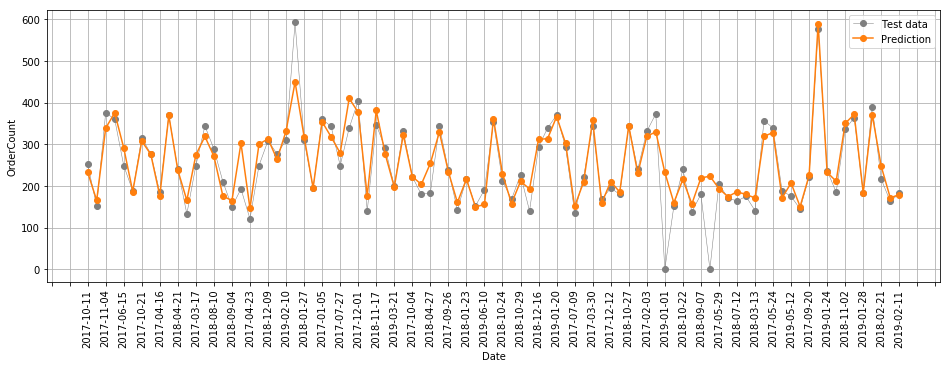

In [42]:
plt.rcParams['figure.figsize'] = [16, 5]
fig, ax = plt.subplots()

tickNumber = len(X_test.index)
plt.locator_params(axis='x', nbins=tickNumber)
plt.locator_params(axis='y', nbins=10)

import numpy as np
x = np.arange(0, len(y_preds))
plt.plot(x, y_test, color='C7', marker='o', linewidth=0.5)
plt.plot(x, y_preds, color='C1', marker='o')

fig.canvas.draw()
plt.xticks(rotation=90)

xticks = [int(item.get_position()[0]) for item in ax.get_xticklabels()]
xticks = [X['Date'][X_test.index[index]] if index >= 0 and index < len(y_preds) else '' for index in xticks]
ax.set_xticklabels(xticks)
ax.set_xlabel('Date')
ax.set_ylabel('OrderCount')
ax.legend(['Test data', 'Prediction'])

plt.grid(True)
plt.show()

## Feature importance
https://github.com/fastai/fastai/blob/master/courses/ml1/lesson2-rf_interpretation.ipynb

Text(0.5, 0, 'Relative Importance')

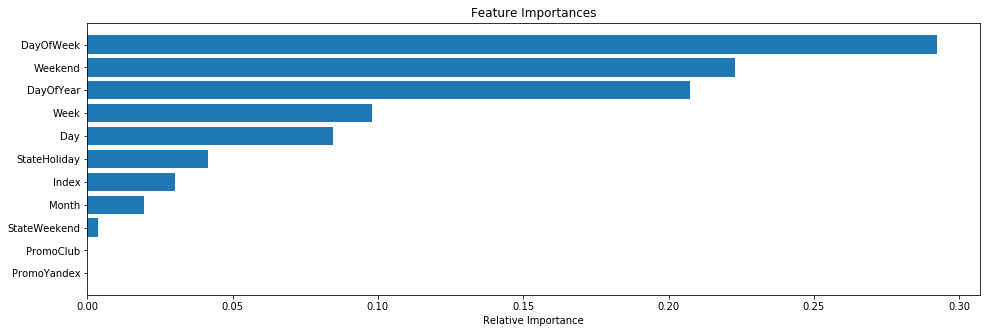

In [43]:
features=X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## Feature correlation

In [44]:
toDrop = ['Date', 'OrderCount', 'PromoYandex', 'PromoClub']
corr = df.drop(toDrop, axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

,Month,Week,Day,DayOfWeek,DayOfYear,StateHoliday,StateWeekend,Weekend,Index
Month,1,0.983979,0.0121661,0.00534695,0.996448,-0.208685,-0.0284371,0.00965974,0.0998846
Week,0.983979,1,0.0830363,-0.00309883,0.986472,-0.224439,-0.0455361,-0.00207893,0.0988343
Day,0.0121661,0.0830363,1,-0.00838582,0.0960352,-0.221733,-0.179811,-0.0190238,0.0206379
DayOfWeek,0.00534695,-0.00309883,-0.00838582,1,0.00455606,0.00265723,0.161321,0.865907,-0.000498398
DayOfYear,0.996448,0.986472,0.0960352,0.00455606,1,-0.225602,-0.0443042,0.00790375,0.100831
StateHoliday,-0.208685,-0.224439,-0.221733,0.00265723,-0.225602,1,-0.0467902,-0.0064769,-0.0338554
StateWeekend,-0.0284371,-0.0455361,-0.179811,0.161321,-0.0443042,-0.0467902,1,0.171783,0.00743674
Weekend,0.00965974,-0.00207893,-0.0190238,0.865907,0.00790375,-0.0064769,0.171783,1,0.000498768
Index,0.0998846,0.0988343,0.0206379,-0.000498398,0.100831,-0.0338554,0.00743674,0.000498768,1


In [45]:
# To drop: Month, Week, Weekend? 

## Bagging
https://github.com/fastai/fastai/blob/master/courses/ml1/lesson1-rf.ipynb

In [46]:
# RandomForestRegressor(n_estimators=50...
len(model.estimators_)

50

In [47]:
preds = np.stack([t.predict(X_test) for t in model.estimators_])
preds[:,0], np.mean(preds[:,0]), y_preds[0]

(array([233.5       , 234.66666667, 257.33333333, 234.        ,
        234.14285714, 236.        , 235.33333333, 237.        ,
        222.        , 242.4       , 222.        , 233.25      ,
        239.5       , 222.        , 224.5       , 237.        ,
        233.        , 224.5       , 237.        , 222.        ,
        239.5       , 224.5       , 222.        , 223.66666667,
        233.5       , 245.75      , 232.66666667, 222.        ,
        225.33333333, 225.33333333, 223.66666667, 243.66666667,
        236.5       , 222.        , 256.        , 224.5       ,
        235.2       , 228.66666667, 235.33333333, 222.        ,
        237.        , 254.66666667, 240.        , 242.66666667,
        223.66666667, 224.5       , 239.5       , 235.33333333,
        223.66666667, 242.66666667]), 232.93152380952378, 232.93152380952378)

In [48]:
preds.shape, X_test.shape, y_preds.shape

((50, 91), (91, 11), (91,))

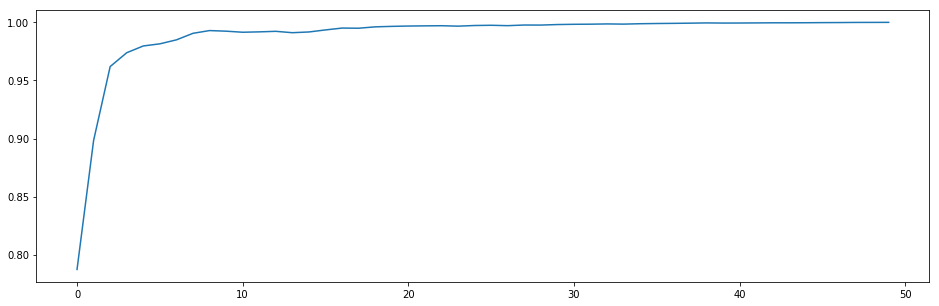

In [49]:
from sklearn import metrics
plt.plot([metrics.r2_score(y_preds, np.mean(preds[:i+1], axis=0)) for i in range(50)]);

# The shape of this curve suggests that adding more trees isn't going to help us much.
# RandomForestRegressor(n_estimators=50...

## Real predictions

In [50]:
df.tail()

,Date,Month,Week,Day,DayOfWeek,DayOfYear,StateHoliday,StateWeekend,Weekend,PromoYandex,PromoClub,OrderCount,Index
901,2019-06-21,6,25,21,5,171,0,0,1,0,0,226,902
902,2019-06-22,6,25,22,6,172,0,0,1,0,0,231,903
903,2019-06-23,6,25,23,7,173,0,0,1,0,0,195,904
904,2019-06-24,6,26,24,1,174,0,0,0,0,0,137,905
905,2019-06-25,6,26,25,2,175,0,0,0,0,0,159,906


In [51]:
df2 = pd.read_csv("sales_test.csv")
df2['Index'] = range(660, len(df2) + 660)
df2_orig = df2.copy()
# After corr analysis
# toDrop = ['Date', 'Year', 'Week', 'Month', 'Weekend']
toDrop = ['Date', 'Year']
df2 = df2.drop(toDrop, axis=1)
df2.head(10)

,Month,Week,Day,DayOfWeek,DayOfYear,StateHoliday,StateWeekend,Weekend,PromoYandex,PromoClub,Index
0,10,43,22,1,294,0,0,0,0,0,660
1,10,43,23,2,295,0,0,0,0,0,661
2,10,43,24,3,296,0,0,0,0,0,662
3,10,43,25,4,297,0,0,0,0,0,663
4,10,43,26,5,298,0,0,1,0,0,664
5,10,43,27,6,299,0,0,1,0,0,665
6,10,43,28,7,300,0,0,1,0,0,666
7,10,44,29,1,301,0,0,0,0,0,667
8,10,44,30,2,302,0,0,0,0,0,668
9,10,44,31,3,303,0,0,0,0,0,669


In [52]:
df2.tail()

,Month,Week,Day,DayOfWeek,DayOfYear,StateHoliday,StateWeekend,Weekend,PromoYandex,PromoClub,Index
432,12,52,28,6,361,0,0,1,0,0,1092
433,12,52,29,7,362,0,0,1,0,0,1093
434,12,1,30,1,363,0,0,0,0,0,1094
435,12,1,31,2,364,0,0,0,0,0,1095
436,1,1,1,3,0,0,0,0,0,0,1096


In [53]:
y_preds = model.predict(df2)

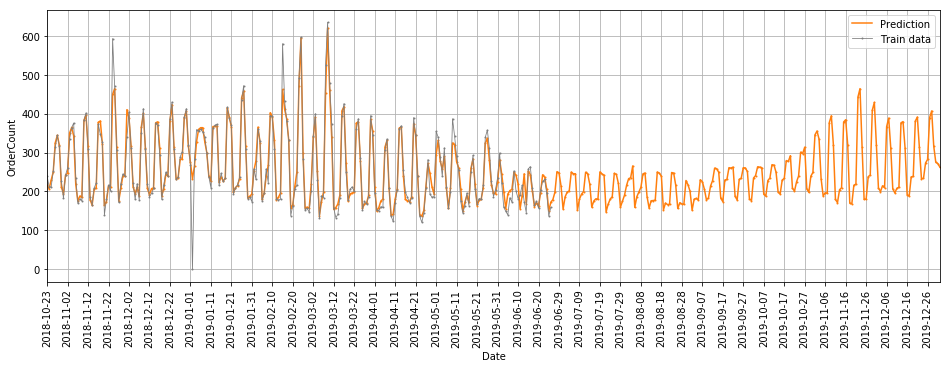

In [54]:
plt.rcParams['figure.figsize'] = [16, 5]
fig, ax = plt.subplots()

tickNumber = len(X_test.index) / 2
plt.locator_params(axis='x', nbins=tickNumber)
plt.locator_params(axis='y', nbins=10)

df2['OrderCount'] = y_preds

df = df.loc[(df['Index'] > 659)]
df2 = df2.loc[(df2['Index'] > 659)]

df2.plot(grid=True, kind='line', x='Index', y='OrderCount', color='C1', 
         ax=ax, label='Prediction', marker='o', markersize=1)
df.plot(grid=True, kind='line', x='Index', y='OrderCount', color='C7', 
        ax=ax, label='Train data', linewidth=0.8, marker='o', markersize=1)

fig.canvas.draw()
plt.xticks(rotation=90)

xticks = [int(item.get_position()[0]) for item in ax.get_xticklabels()]

for index,value in enumerate(xticks):
    if value >= min(df['Index']) and value <= max(df['Index']):
        xticks[index] = df['Date'][value]
    else:
        if value >= min(df2['Index']) and value <= max(df2['Index']):
            raw = df2_orig.loc[df2['Index'] == value]['Date']
            xticks[index] = raw[raw.index[0]]

ax.set_xticklabels(xticks)
ax.set_xlabel('Date')
ax.set_ylabel('OrderCount')

plt.grid(True)
plt.show()